# Import Libraries


In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Import Dataset


In [18]:
df = pd.read_csv("Final_Dataset_4.csv")
df_pred = pd.read_csv("to_be_predicted.csv")
# df_pred

In [19]:
df.head()
df.loc[143]

points_scored                                                                        5.48
plus_minus                                                                           2.12
outcome                                                                                28
seconds_played_per_game                                                             989.4
made_field_goals_percent                                                             59.9
made_three_point_field_goals_percent                                                  0.0
made_free_throws_percent                                                             60.0
offensive_rebounds                                                                   1.98
defensive_rebounds                                                                    3.4
assists                                                                              0.31
steals                                                                                0.5
blocks    

In [20]:
game_score = df["game_score"]
game_score[game_score < 0]

Series([], Name: game_score, dtype: float64)

In [21]:
df.drop("Name_Year", axis=1, inplace=True)
df.head()

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
0,22.90,0.57,42,2134.01,52.10,27.22,76.96,1.78,6.98,5.42,...,2.92,3.08,20.40,Giannis Antetokounmpo,2016,22,2016-2017_antetgi01_regular_season_box_scores.csv,Milwaukee Bucks,"$24,157,303",PF
1,9.51,-1.92,20,1302.03,56.82,22.58,72.36,1.89,1.97,1.20,...,1.30,1.68,7.59,Robin Lopez,2018,30,2018-2019_lopezro01_regular_season_box_scores.csv,Milwaukee Bucks,"$4,767,000",C
2,10.85,0.05,41,1529.69,51.48,23.08,71.52,2.03,4.19,0.94,...,1.35,2.09,8.38,Taj Gibson,2016,27,2016-2017_gibsota01_regular_season_box_scores.csv,Minnesota Timberwolves,"$14,000,000",F
3,10.23,0.86,41,1219.09,38.94,35.65,71.88,0.48,2.43,2.41,...,1.71,1.70,6.15,Tyreke Evans,2018,30,2018-2019_evansty01_regular_season_box_scores.csv,Indiana Pacers,"$12,400,000",G
4,21.12,-2.37,20,1922.73,47.98,29.19,70.47,0.69,3.16,6.82,...,3.10,2.84,15.97,De'Aaron Fox,2019,22,2019-2020_foxde01_regular_season_box_scores.csv,Sacramento Kings,"$8,099,627",PG


# Highest Paid player in the last season


In [22]:
# Convert salary from str to integer
integer_salary = lambda a: int(a[1:].replace(",", ""))
df["SALARY"] = df["SALARY"].apply(integer_salary)

In [23]:
df[df["Start_Year_x"] == 2022].sort_values(["SALARY"], ascending=False)[:5]

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION


# Salary and Position


In [24]:
map_dict = {e: i + 1 for i, e in enumerate(df.POSITION.unique())}
df["POSITION"] = df["POSITION"].map(map_dict)
df.head()

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
0,22.90,0.57,42,2134.01,52.10,27.22,76.96,1.78,6.98,5.42,...,2.92,3.08,20.40,Giannis Antetokounmpo,2016,22,2016-2017_antetgi01_regular_season_box_scores.csv,Milwaukee Bucks,24157303,1
1,9.51,-1.92,20,1302.03,56.82,22.58,72.36,1.89,1.97,1.20,...,1.30,1.68,7.59,Robin Lopez,2018,30,2018-2019_lopezro01_regular_season_box_scores.csv,Milwaukee Bucks,4767000,2
2,10.85,0.05,41,1529.69,51.48,23.08,71.52,2.03,4.19,0.94,...,1.35,2.09,8.38,Taj Gibson,2016,27,2016-2017_gibsota01_regular_season_box_scores.csv,Minnesota Timberwolves,14000000,3
3,10.23,0.86,41,1219.09,38.94,35.65,71.88,0.48,2.43,2.41,...,1.71,1.70,6.15,Tyreke Evans,2018,30,2018-2019_evansty01_regular_season_box_scores.csv,Indiana Pacers,12400000,4
4,21.12,-2.37,20,1922.73,47.98,29.19,70.47,0.69,3.16,6.82,...,3.10,2.84,15.97,De'Aaron Fox,2019,22,2019-2020_foxde01_regular_season_box_scores.csv,Sacramento Kings,8099627,5


In [25]:
team_map = {e: i + 1 for i, e in enumerate(df.TEAM.unique())}
df["TEAM"] = df["TEAM"].map(team_map)
df.head()

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
0,22.90,0.57,42,2134.01,52.10,27.22,76.96,1.78,6.98,5.42,...,2.92,3.08,20.40,Giannis Antetokounmpo,2016,22,2016-2017_antetgi01_regular_season_box_scores.csv,1,24157303,1
1,9.51,-1.92,20,1302.03,56.82,22.58,72.36,1.89,1.97,1.20,...,1.30,1.68,7.59,Robin Lopez,2018,30,2018-2019_lopezro01_regular_season_box_scores.csv,1,4767000,2
2,10.85,0.05,41,1529.69,51.48,23.08,71.52,2.03,4.19,0.94,...,1.35,2.09,8.38,Taj Gibson,2016,27,2016-2017_gibsota01_regular_season_box_scores.csv,2,14000000,3
3,10.23,0.86,41,1219.09,38.94,35.65,71.88,0.48,2.43,2.41,...,1.71,1.70,6.15,Tyreke Evans,2018,30,2018-2019_evansty01_regular_season_box_scores.csv,3,12400000,4
4,21.12,-2.37,20,1922.73,47.98,29.19,70.47,0.69,3.16,6.82,...,3.10,2.84,15.97,De'Aaron Fox,2019,22,2019-2020_foxde01_regular_season_box_scores.csv,4,8099627,5


In [26]:
team_map = {e: i + 1 for i, e in enumerate(df["NAME_x"].unique())}
df["NAME_x"] = df["NAME_x"].map(team_map)
df.head()

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
0,22.90,0.57,42,2134.01,52.10,27.22,76.96,1.78,6.98,5.42,...,2.92,3.08,20.40,1,2016,22,2016-2017_antetgi01_regular_season_box_scores.csv,1,24157303,1
1,9.51,-1.92,20,1302.03,56.82,22.58,72.36,1.89,1.97,1.20,...,1.30,1.68,7.59,2,2018,30,2018-2019_lopezro01_regular_season_box_scores.csv,1,4767000,2
2,10.85,0.05,41,1529.69,51.48,23.08,71.52,2.03,4.19,0.94,...,1.35,2.09,8.38,3,2016,27,2016-2017_gibsota01_regular_season_box_scores.csv,2,14000000,3
3,10.23,0.86,41,1219.09,38.94,35.65,71.88,0.48,2.43,2.41,...,1.71,1.70,6.15,4,2018,30,2018-2019_evansty01_regular_season_box_scores.csv,3,12400000,4
4,21.12,-2.37,20,1922.73,47.98,29.19,70.47,0.69,3.16,6.82,...,3.10,2.84,15.97,5,2019,22,2019-2020_foxde01_regular_season_box_scores.csv,4,8099627,5


In [27]:
sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])

In [28]:
df[["SALARY"]].head()

,SALARY
0,24157303
1,4767000
2,14000000
3,12400000
4,8099627


In [29]:
df.columns

Index(['points_scored', 'plus_minus', 'outcome', 'seconds_played_per_game',
       'made_field_goals_percent', 'made_three_point_field_goals_percent',
       'made_free_throws_percent', 'offensive_rebounds', 'defensive_rebounds',
       'assists', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'game_score', 'NAME_x', 'Start_Year_x', 'Age', 'File_Name', 'TEAM',
       'SALARY', 'POSITION'],
      dtype='object')

In [30]:
df.sort_values(["Start_Year_x"])

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
598,29.71,8.55,60,2341.41,50.26,33.33,76.71,0.93,6.36,8.57,...,3.43,1.57,25.58,18,2009,25,2009-2010_jamesle01_regular_season_box_scores.csv,18,14500000,6
369,14.03,-3.70,12,1713.98,45.05,33.02,81.52,3.78,7.18,2.27,...,1.95,2.27,12.62,15,2009,21,2009-2010_loveke01_regular_season_box_scores.csv,2,3638280,1
134,7.78,1.21,50,1093.37,55.56,0.00,54.66,2.44,3.98,0.79,...,1.37,2.73,6.48,21,2009,21,2009-2010_blairde01_regular_season_box_scores.csv,6,918000,2
132,16.85,-3.73,23,2157.11,44.90,37.07,74.25,0.40,2.18,3.00,...,2.32,1.55,11.14,13,2009,20,2009-2010_gordoer01_regular_season_box_scores.csv,8,3016680,7
530,11.68,0.14,31,1507.22,49.49,50.00,75.45,2.19,3.54,1.95,...,1.79,3.52,8.82,55,2009,23,2009-2010_hibbero01_regular_season_box_scores.csv,3,1685280,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,7.22,4.13,28,1496.11,40.35,34.67,77.27,0.27,2.64,3.51,...,1.02,1.82,6.04,29,2021,33,2021-2022_inglejo01_regular_season_box_scores.csv,1,6479000,7
139,6.41,-1.68,29,1026.52,42.49,26.21,72.37,1.07,3.00,1.88,...,0.55,1.70,5.69,26,2021,35,2021-2022_griffbl01_regular_season_box_scores.csv,22,1836090,1
524,13.61,1.26,38,1349.95,42.97,39.20,83.84,1.18,6.07,2.16,...,1.32,1.36,10.81,15,2021,33,2021-2022_loveke01_regular_season_box_scores.csv,18,3114138,1
518,30.27,-2.09,25,2233.16,52.42,35.94,75.60,1.12,7.07,6.23,...,3.50,2.16,23.94,18,2021,37,2021-2022_jamesle01_regular_season_box_scores.csv,11,44474988,6


In [31]:
df_new = (
    df[
        [
            "points_scored",
            "outcome",
            "seconds_played_per_game",
            "offensive_rebounds",
            "defensive_rebounds",
            "assists",
            "steals",
            "blocks",
            "turnovers",
            "personal_fouls",
            "game_score",
            "POSITION",
        ]
    ]
    .groupby("POSITION")
    .mean()
)

# Points Scored and salary


In [32]:
df[["points_scored", "SALARY"]].corr()

,points_scored,SALARY
points_scored,1.000000,0.654266
SALARY,0.654266,1.000000


In [33]:
df.corr()["SALARY"]

points_scored                           0.654266
plus_minus                              0.340676
outcome                                 0.100581
seconds_played_per_game                 0.482219
made_field_goals_percent                0.114217
made_three_point_field_goals_percent    0.192993
made_free_throws_percent                0.231016
offensive_rebounds                     -0.002646
defensive_rebounds                      0.443267
assists                                 0.468257
steals                                  0.331495
blocks                                  0.086717
turnovers                               0.512588
personal_fouls                          0.134778
game_score                              0.677190
NAME_x                                  0.051660
Start_Year_x                            0.545639
Age                                     0.374536
TEAM                                    0.101989
SALARY                                  1.000000
POSITION            

In [34]:
df

,points_scored,plus_minus,outcome,seconds_played_per_game,made_field_goals_percent,made_three_point_field_goals_percent,made_free_throws_percent,offensive_rebounds,defensive_rebounds,assists,...,turnovers,personal_fouls,game_score,NAME_x,Start_Year_x,Age,File_Name,TEAM,SALARY,POSITION
0,22.90,0.57,42,2134.01,52.10,27.22,76.96,1.78,6.98,5.42,...,2.92,3.08,20.40,1,2016,22,2016-2017_antetgi01_regular_season_box_scores.csv,1,24157303,1
1,9.51,-1.92,20,1302.03,56.82,22.58,72.36,1.89,1.97,1.20,...,1.30,1.68,7.59,2,2018,30,2018-2019_lopezro01_regular_season_box_scores.csv,1,4767000,2
2,10.85,0.05,41,1529.69,51.48,23.08,71.52,2.03,4.19,0.94,...,1.35,2.09,8.38,3,2016,27,2016-2017_gibsota01_regular_season_box_scores.csv,2,14000000,3
3,10.23,0.86,41,1219.09,38.94,35.65,71.88,0.48,2.43,2.41,...,1.71,1.70,6.15,4,2018,30,2018-2019_evansty01_regular_season_box_scores.csv,3,12400000,4
4,21.12,-2.37,20,1922.73,47.98,29.19,70.47,0.69,3.16,6.82,...,3.10,2.84,15.97,5,2019,22,2019-2020_foxde01_regular_season_box_scores.csv,4,8099627,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,11.85,0.79,36,1831.50,45.56,34.59,83.19,0.89,2.59,3.14,...,1.65,1.61,9.56,54,2011,16,2011-2012_haywago01_regular_season_box_scores.csv,5,2709720,6
659,22.50,-1.79,32,2276.71,50.58,29.17,64.17,3.29,8.77,3.80,...,2.72,3.07,17.74,26,2010,24,2010-2011_griffbl01_regular_season_box_scores.csv,8,5731080,1
660,25.87,4.12,41,2028.94,44.84,35.47,85.30,0.82,3.39,5.34,...,2.99,2.45,17.87,41,2021,24,2021-2022_mitchdo01_regular_season_box_scores.csv,9,30913750,7
661,27.26,10.00,52,2027.14,47.16,43.70,91.64,0.65,4.70,5.23,...,2.78,2.41,20.56,42,2018,30,2018-2019_curryst01_regular_season_box_scores.csv,25,40231758,5


In [35]:
import numpy as np

np.any(np.isnan(df))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [36]:
df.isna().sum()

points_scored                           0
plus_minus                              0
outcome                                 0
seconds_played_per_game                 0
made_field_goals_percent                0
made_three_point_field_goals_percent    0
made_free_throws_percent                0
offensive_rebounds                      0
defensive_rebounds                      0
assists                                 0
steals                                  0
blocks                                  0
turnovers                               0
personal_fouls                          0
game_score                              0
NAME_x                                  0
Start_Year_x                            0
Age                                     0
File_Name                               0
TEAM                                    0
SALARY                                  0
POSITION                                0
dtype: int64

Root Mean Squared Error is : 0.7381618634339954
R sq is : 0.4551170633716517


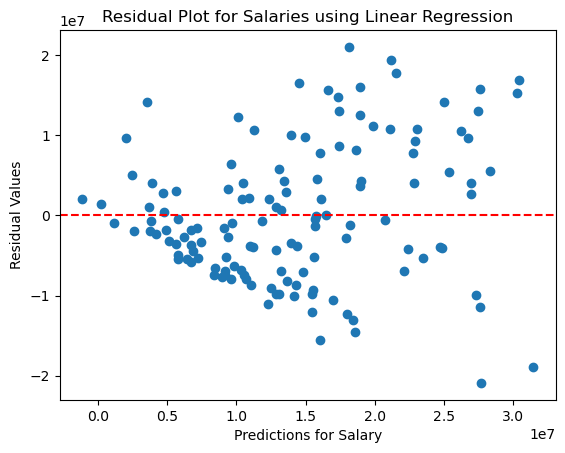

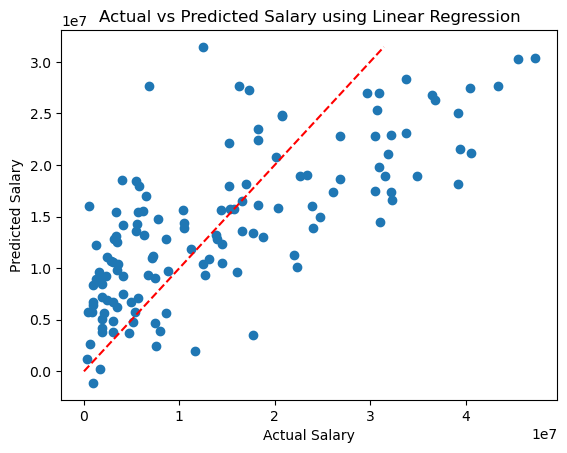

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

# target array

df_features = df[["game_score"]]
sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])

# ADVANCED STATS
linreg = LinearRegression()

# Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=123
)
linreg.fit(x_train, y_train)
predictions = linreg.predict(x_test)


# cross validate model
predict_lr = cross_val_predict(linreg, df_features, salary, cv=6)

y_test = sc_X.inverse_transform(y_test)

# get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict_lr, salary))
score = metrics.r2_score(salary, predict_lr)
print("Root Mean Squared Error is :", rmse)
print("R sq is :", score)
y_test = sc_y_test.inverse_transform(y_test)
predict_1 = sc_X.inverse_transform(predictions)
# create residual plot
residuals = y_test - predict_1
plt.scatter(predict_1, residuals)
plt.xlabel("Predictions for Salary")
plt.ylabel("Residual Values")
plt.title("Residual Plot for Salaries using Linear Regression")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

# salary_1 = sc_X.inverse_transform(salary_std)
# #salary_1


# #salary_1
# predictions_1 = sc_y_test.inverse_transform(predictions)
plt.scatter(y_test, predict_1)
plt.plot([0, np.max(predict_1)], [0, np.max(predict_1)], "r--")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary using Linear Regression")
plt.show()

# #predict on 2022
# predicted_final=linreg.predict(df_pred_features)
# predicted_final=sc_X.inverse_transform(predict_1)
# predicted_final

Root Mean Squared Error is : 0.7017854191715318
R sq is : 0.5074972254382375


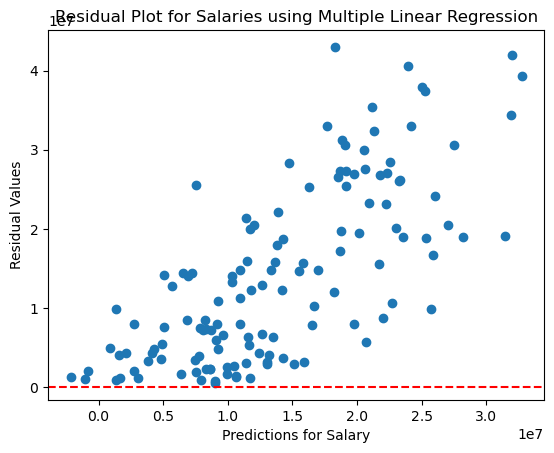

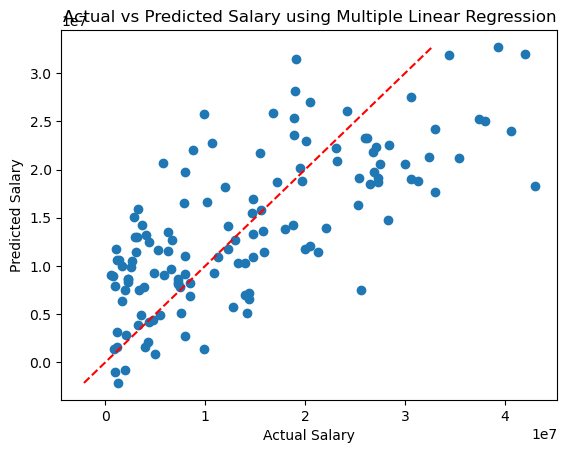

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

# target array

sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])

df_features = df[
    [
        "points_scored",
        "POSITION",
        "personal_fouls",
        "defensive_rebounds",
        "made_field_goals_percent",
        "outcome",
        "turnovers",
        "blocks",
        "assists",
        "plus_minus",
    ]
]
# df_features=df[['seconds_played_per_game', 'made_three_point_field_goals_percent',
#         'blocks', 'steals', 'assists',
#        'defensive_rebounds', 'made_free_throws_percent',
#        'made_field_goals_percent', 'outcome', 'plus_minus', 'points_scored']]
# ADVANCED STATS
linreg = LinearRegression()

# Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=42
)
linreg.fit(x_train, y_train)
predictions = linreg.predict(x_test)
# cross validate model
predict = cross_val_predict(linreg, df_features, salary, cv=6)

# get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, salary))
score = metrics.r2_score(salary, predict)
print("Root Mean Squared Error is :", rmse)
print("R sq is :", score)
y_test = sc_X.inverse_transform(y_test)
predict_1 = sc_X.inverse_transform(predictions)
# y_pred = sc_X.inverse_transform(y_pred)
# create residual plot
residuals = y_test - predictions
plt.scatter(predict_1, residuals)
plt.xlabel("Predictions for Salary")
plt.ylabel("Residual Values")
plt.title("Residual Plot for Salaries using Multiple Linear Regression")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

# salary_1 = sc_X.inverse_transform(salary_std)
# salary_1

# y_test_1 = sc_y_test.inverse_transform(y_test)
# #salary_1
# predictions_1 = sc_y_test.inverse_transform(predictions)
plt.scatter(y_test, predict_1)
plt.plot(
    [np.min(predict_1), np.max(predict_1)],
    [np.min(predict_1), np.max(predict_1)],
    "r--",
)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary using Multiple Linear Regression")
plt.show()

In [378]:
df_features.describe()

,Start_Year_x,personal_fouls,blocks,offensive_rebounds,defensive_rebounds,assists,steals,turnovers,POSITION,TEAM
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2015.885645,2.233333,0.673333,1.269684,4.456959,3.950170,0.982603,2.199951,3.313869,13.669100
std,3.128791,0.596361,0.598337,0.903741,2.054397,2.590906,0.466063,0.978124,1.867900,8.001676
min,2009.000000,0.500000,0.000000,0.000000,0.870000,0.100000,0.060000,0.360000,1.000000,1.000000
25%,2014.000000,1.830000,0.290000,0.610000,3.050000,1.710000,0.625000,1.415000,2.000000,7.000000
50%,2016.000000,2.200000,0.450000,0.910000,4.020000,3.520000,0.910000,2.110000,3.000000,14.000000
75%,2018.000000,2.650000,0.835000,1.750000,5.720000,5.845000,1.280000,2.845000,5.000000,20.000000
max,2021.000000,3.820000,3.380000,4.840000,10.940000,11.740000,2.310000,5.730000,7.000000,32.000000


RMSE: 0.6590528876369663
R-squared: 0.5261718693667885


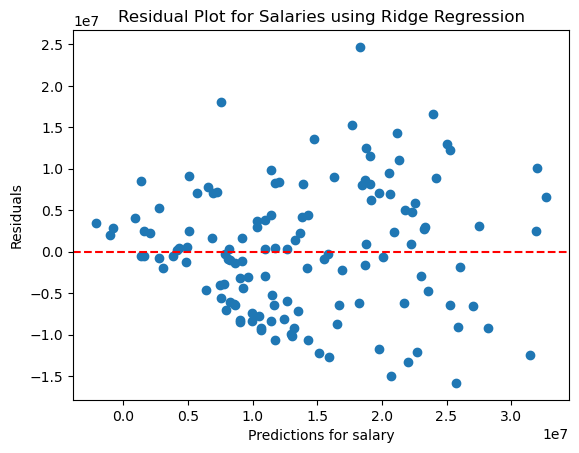

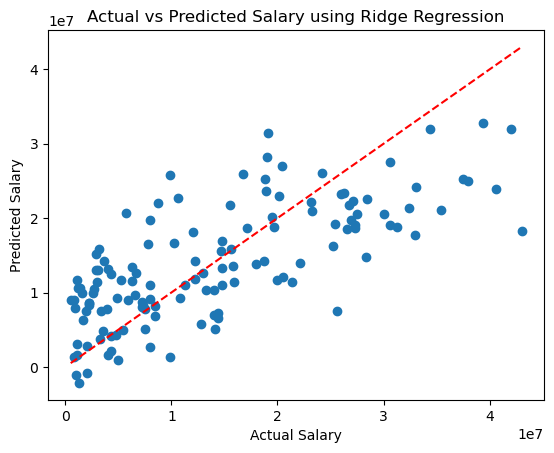

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])
# df_features=df[['seconds_played_per_game', 'made_three_point_field_goals_percent',
#         'blocks', 'steals', 'assists',
#        'defensive_rebounds', 'made_free_throws_percent',
#        'made_field_goals_percent', 'outcome', 'plus_minus', 'points_scored']]
df_features = df[
    [
        "points_scored",
        "POSITION",
        "personal_fouls",
        "defensive_rebounds",
        "made_field_goals_percent",
        "outcome",
        "turnovers",
        "blocks",
        "assists",
        "plus_minus",
    ]
]
X_train, X_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=42
)
ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
# Calculate R-squared
rsq = r2_score(y_test, y_pred)
print("R-squared:", rsq)

import matplotlib.pyplot as plt

y_test = sc_X.inverse_transform(y_test)
y_pred = sc_X.inverse_transform(y_pred)

# Assuming you have already performed the ridge regression and have y_test and y_pred as your true and predicted values respectively
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)

# Add a horizontal line at y=0 to indicate zero residual
plt.axhline(y=0, color="red", linestyle="--")

# Add labels and title
plt.xlabel("Predictions for salary")
plt.ylabel("Residuals")
plt.title("Residual Plot for Salaries using Ridge Regression")

# Show the plot
plt.show()

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line to indicate perfect prediction
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], "r--")

# Add labels and title
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary using Ridge Regression")

# Show the plot
plt.show()

RMSE: 0.760640167432808
R-squared: 0.3688409445724484


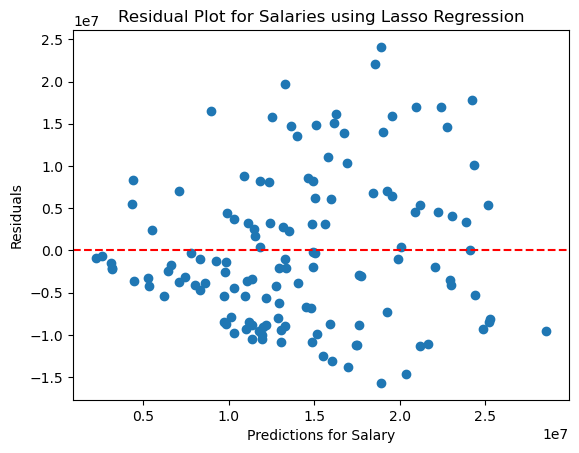

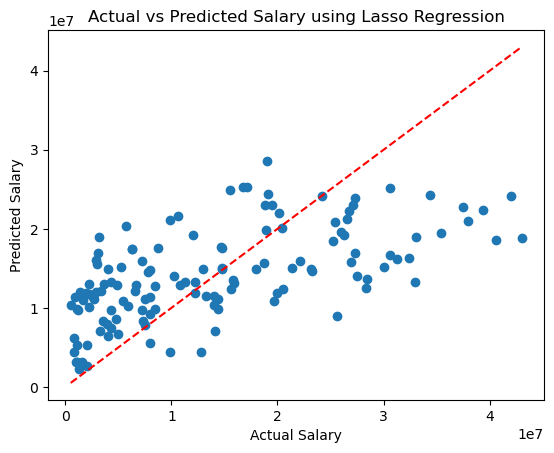

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])
# df_features=df[['Start_Year_x',
#  'personal_fouls',
#  'blocks',
#  'offensive_rebounds',
#  'defensive_rebounds',
#  'assists',
#  'steals',
#  'turnovers',
#  'game_score',
#  'POSITION',
#  'TEAM']]
df_features = df[
    [
        "points_scored",
        "POSITION",
        "personal_fouls",
        "defensive_rebounds",
        "made_field_goals_percent",
        "outcome",
        "turnovers",
        "blocks",
        "assists",
        "plus_minus",
    ]
]
X_train, X_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=42
)
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
# Calculate R-squared
rsq = r2_score(y_test, y_pred)
print("R-squared:", rsq)

import matplotlib.pyplot as plt

y_test = sc_X.inverse_transform(y_test)
y_pred = sc_X.inverse_transform(y_pred.reshape(-1, 1))
# Assuming you have already performed the ridge regression and have y_test and y_pred as your true and predicted values respectively
residuals = y_test - y_pred


# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)

# Add a horizontal line at y=0 to indicate zero residual
plt.axhline(y=0, color="red", linestyle="--")

# Add labels and title
plt.xlabel("Predictions for Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot for Salaries using Lasso Regression")

# Show the plot
plt.show()

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line to indicate perfect prediction
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], "r--")

# Add labels and title
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary using Lasso Regression")

# Show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.667702498607985
R-squared: 0.5136529241041236


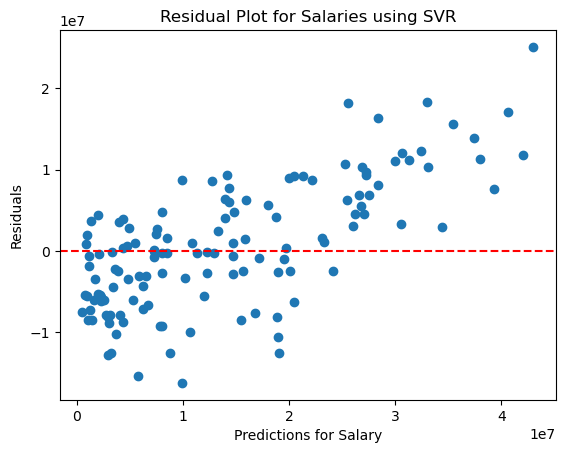

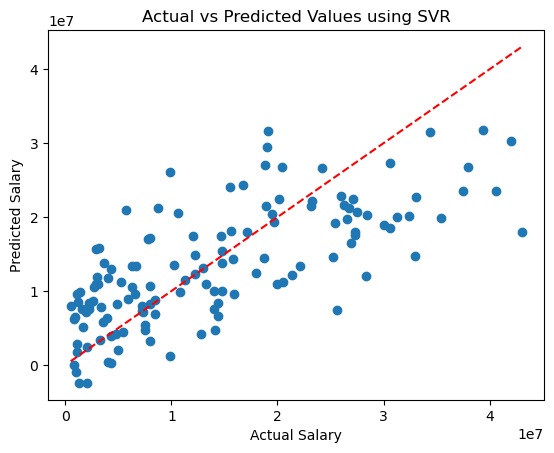

In [78]:
from sklearn.svm import SVR

sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])
# df_features=df[['seconds_played_per_game', 'made_three_point_field_goals_percent',
#        'offensive_rebounds', 'blocks', 'steals', 'assists',
#        'defensive_rebounds', 'made_free_throws_percent',
#        'made_field_goals_percent', 'outcome', 'plus_minus', 'points_scored']]
df_features = df[
    [
        "points_scored",
        "POSITION",
        "personal_fouls",
        "defensive_rebounds",
        "made_field_goals_percent",
        "outcome",
        "turnovers",
        "blocks",
        "assists",
        "plus_minus",
    ]
]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=42
)

# Create an instance of the SVR model
svr = SVR(kernel="linear", C=1.0, epsilon=0.1)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
rsq = r2_score(y_test, y_pred)
print("R-squared:", rsq)
y_test = sc_X.inverse_transform(y_test)
y_pred = sc_X.inverse_transform(y_pred.reshape(-1, 1))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.title("Residual Plot for Salaries using SVR")
plt.xlabel("Predictions for Salary")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
# Add a diagonal line to indicate perfect prediction
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], "r--")
plt.title("Actual vs Predicted Values using SVR")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

RMSE: 0.8305613385352436
R-squared: 0.24747015393471394


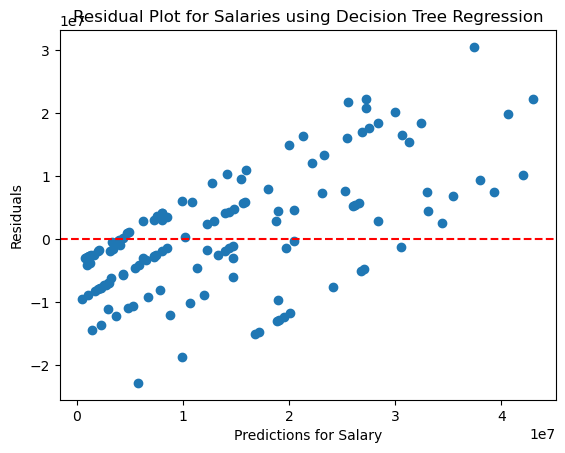

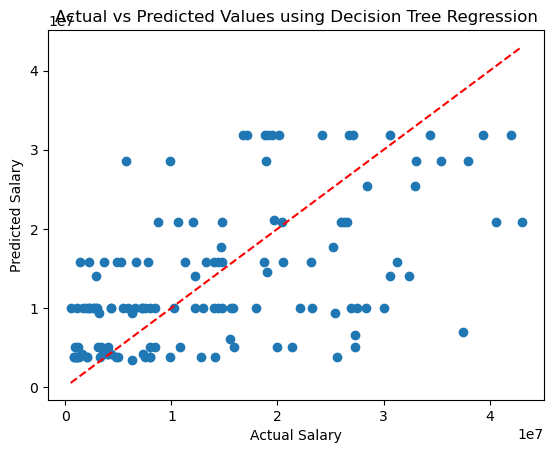

In [79]:
from sklearn.tree import DecisionTreeRegressor

sc_X = StandardScaler()
salary = sc_X.fit_transform(df[["SALARY"]])
# df_features=df[['seconds_played_per_game', 'made_three_point_field_goals_percent',
#        'offensive_rebounds', 'blocks', 'steals', 'assists',
#        'defensive_rebounds', 'made_free_throws_percent',
#        'made_field_goals_percent', 'outcome', 'plus_minus', 'points_scored']]
df_features = df[
    [
        "points_scored",
        "POSITION",
        "personal_fouls",
        "defensive_rebounds",
        "made_field_goals_percent",
        "outcome",
        "turnovers",
        "blocks",
        "assists",
        "plus_minus",
    ]
]
X_train, X_test, y_train, y_test = train_test_split(
    df_features, salary, test_size=0.2, random_state=42
)

# Create an instance of the DecisionTreeRegressor model
dt = DecisionTreeRegressor(max_depth=5)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Calculate R-squared
rsq = r2_score(y_test, y_pred)
print("R-squared:", rsq)

y_test = sc_X.inverse_transform(y_test)
y_pred = sc_X.inverse_transform(y_pred.reshape(-1, 1))
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.title("Residual Plot for Salaries using Decision Tree Regression")
plt.xlabel("Predictions for Salary")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
# Add a diagonal line to indicate perfect prediction
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], "r--")
plt.title("Actual vs Predicted Values using Decision Tree Regression")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()

#### Comparing the results from Linear regression, Multiple Linear regression, Ridge, Lasso, Support vector and Decision Tree regression:

| Model           | R-squared | RMSE test |
| --------------- | --------- | --------- |
| Linear          | 45.51%    | 0.7381    |
| Multiple Linear | 50.74%    | 0.7017    |
| Ridge           | 52.61%    | 0.6590    |
| Lasso           | 36.88%    | 0.7606    |
| Support Vector  | 51.36%    | 0.6677    |
| Decision Tree   | 24.74%    | 0.8306    |


In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15, 12))

ax[0, 0].bar(df_new.index, df_new.points_scored)
ax[0, 0].set_ylabel("Points Scored")
ax[0, 0].set_title("Position and Points scored")

ax[0, 1].bar(df_new.index, df_new.seconds_played_per_game)
ax[0, 1].set_ylabel("Seconds_played_per_game")
ax[0, 1].set_title("Position and Seconds_played_per_game")

ax[1, 0].bar(df_new.index, df_new.assists)
ax[1, 0].set_ylabel("Assists")
ax[1, 0].set_title("Position and Assists")

ax[1, 1].bar(df_new.index, df_new.steals)
ax[1, 1].set_ylabel("Steals")
ax[1, 1].set_title("Position and Steals")

ax[2, 0].bar(df_new.index, df_new.blocks)
ax[2, 0].set_ylabel("Blocks")
ax[2, 0].set_title("Position and Blocks")

ax[2, 1].bar(df_new.index, df_new.turnovers)
ax[2, 1].set_ylabel("Turnovers")
ax[2, 1].set_title("Position and Turnovers")

plt.show()

# DONE!
